# Printo Marketing Analysis

The dataset contains **99,457** records and **10** columns.  
Here's an overview of the columns:

1. **invoice_no** - Unique identifier for each transaction.  
2. **customer_id** - Unique identifier for each customer.  
3. **gender** - Gender of the customer.  
4. **age** - Age of the customer.  
5. **category** - Product category purchased (e.g., Clothing, Shoes, Books).  
6. **quantity** - Number of items purchased.  
7. **price** - Total price of the transaction.  
8. **payment_method** - Method of payment (Credit Card, Debit Card, Cash).  
9. **invoice_date** - Date of purchase.  
10. **shopping_mall** - Mall where the purchase occurred.  


In [4]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import mlxtend
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

## Q1.Analyze and share useful insights that can be observed from the data

In [7]:
## Importing Dataset
file_path = 'C:/Users/Dell/Desktop/Complete Python & Machine Learnings/Printo/customer_shopping_data.csv' 
data = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon


In [9]:
## Dataset size
print('Dataset Shape :', data.shape)

Dataset Shape : (99457, 10)


In [11]:
##Info about dataset
print("Basic Information about the dataset:\n",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
Basic Information about the dataset:
 None


In [13]:
## Finding Missing Value
print("Missing values in  columns:\n",data.isnull().sum())

Missing values in  columns:
 invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [15]:
## Finding Duplicate
print("Duplicate Rows Count:", data.duplicated().sum())

Duplicate Rows Count: 0


In [17]:
## Statistics for numerical column
print("Statistics for numerical columns:\n",data.describe())

Statistics for numerical columns:
                 age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000


## Sales Trends Over Time

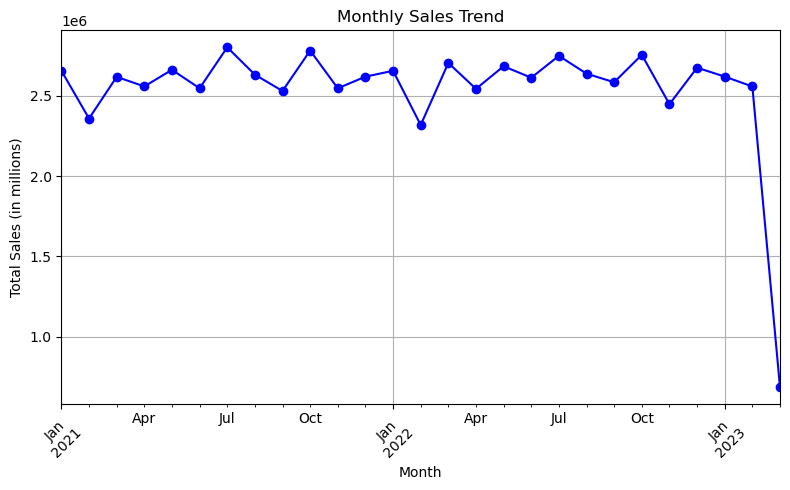

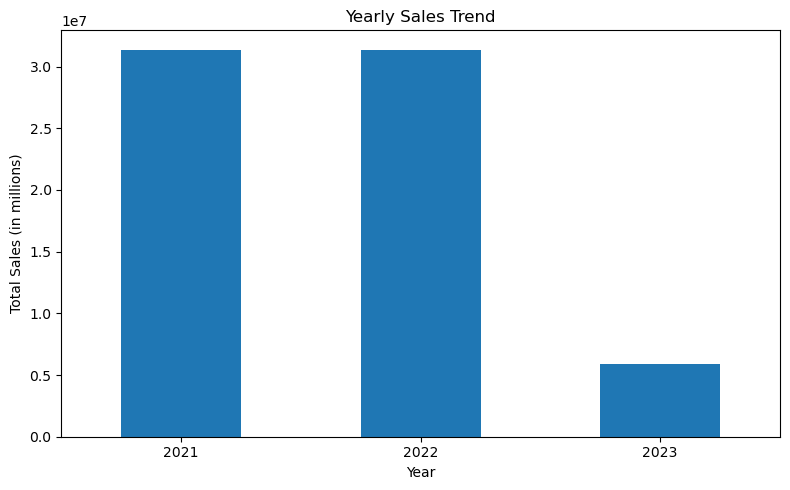

In [20]:
## Sales Trends Over Time
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='%d-%m-%Y')
data['month'] = data['invoice_date'].dt.to_period('M')
monthly_sales = data.groupby('month')['price'].sum()
data['year'] = data['invoice_date'].dt.year
yearly_sales = data.groupby('year')['price'].sum()
# Plotting Monthly Sales Trend
plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', color='blue')
plt.xlabel('Month')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Yearly Sales Trend
plt.figure(figsize=(8, 5))
yearly_sales.plot(kind='bar',title='Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



## Customer Demographics

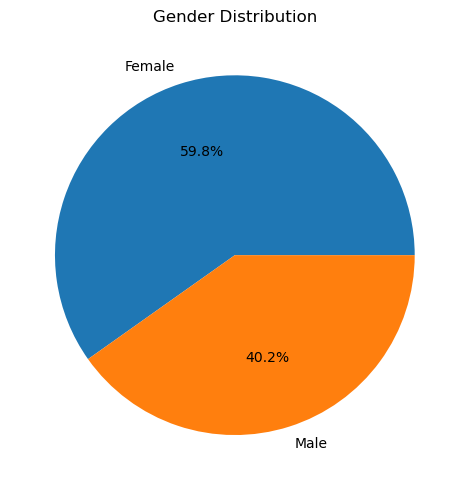

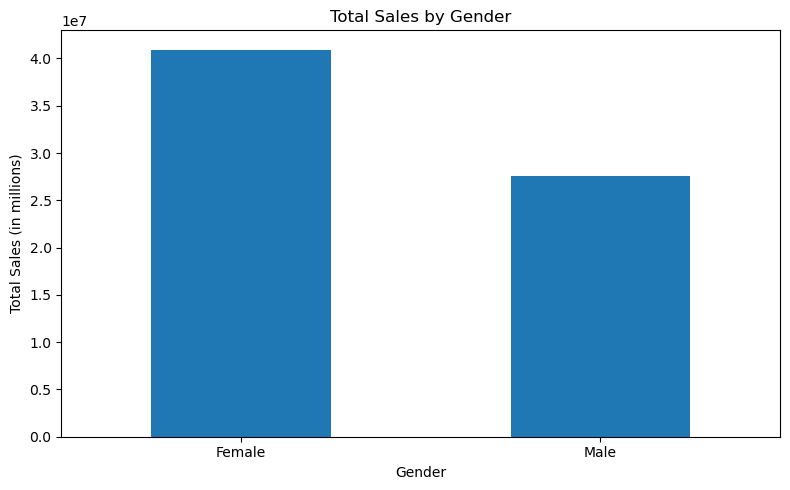

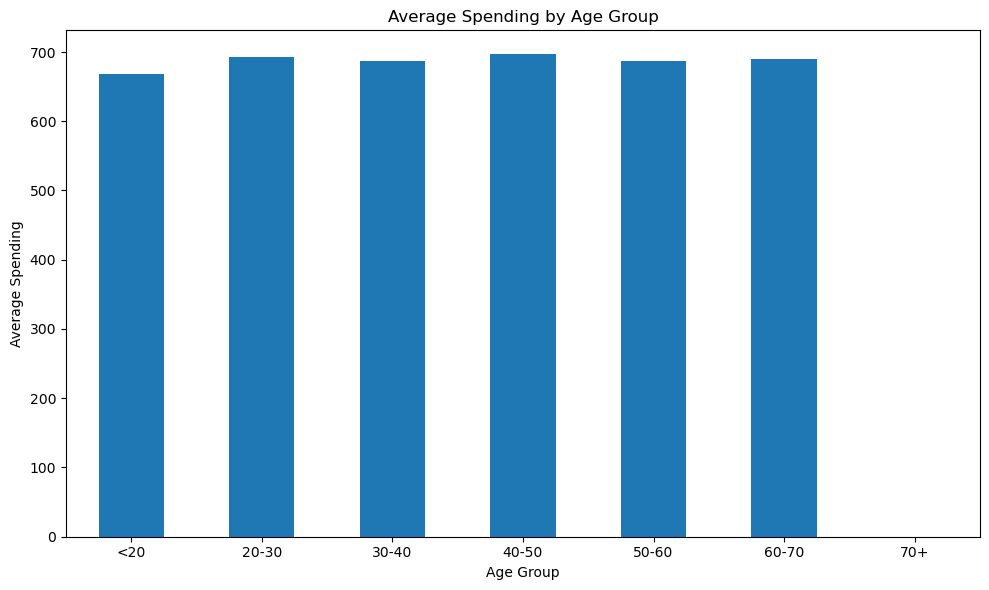

In [23]:
# Gender Distribution
gender_distribution = data['gender'].value_counts()
sales_by_gender = data.groupby('gender')['price'].sum()

# Age Distribution and Spending Behavior
age_distribution = data['age'].describe()
data['age_group'] = pd.cut(data['age'], bins=[0, 20, 30, 40, 50, 60, 70, 100], 
                           labels=['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+'])
spending_by_age_group = data.groupby('age_group')['price'].mean()
# Visualization for Gender Distribution
plt.figure(figsize=(8, 5))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Visualization for Total Sales by Gender
plt.figure(figsize=(8, 5))
sales_by_gender.plot(kind='bar', title='Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualization for Spending Behavior by Age Group
plt.figure(figsize=(10, 6))
spending_by_age_group.plot(kind='bar', title='Average Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()





## Category Analysis

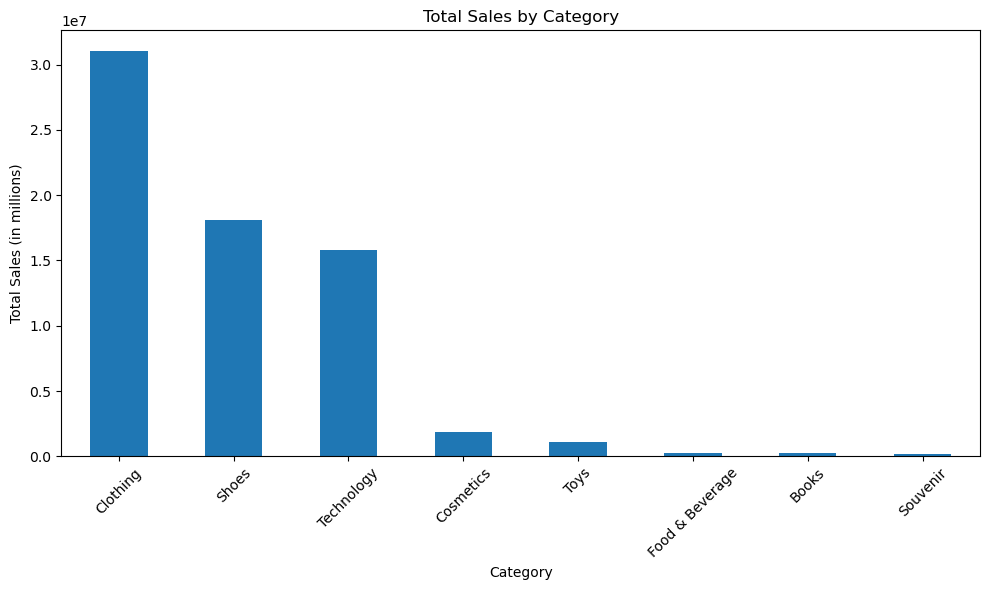

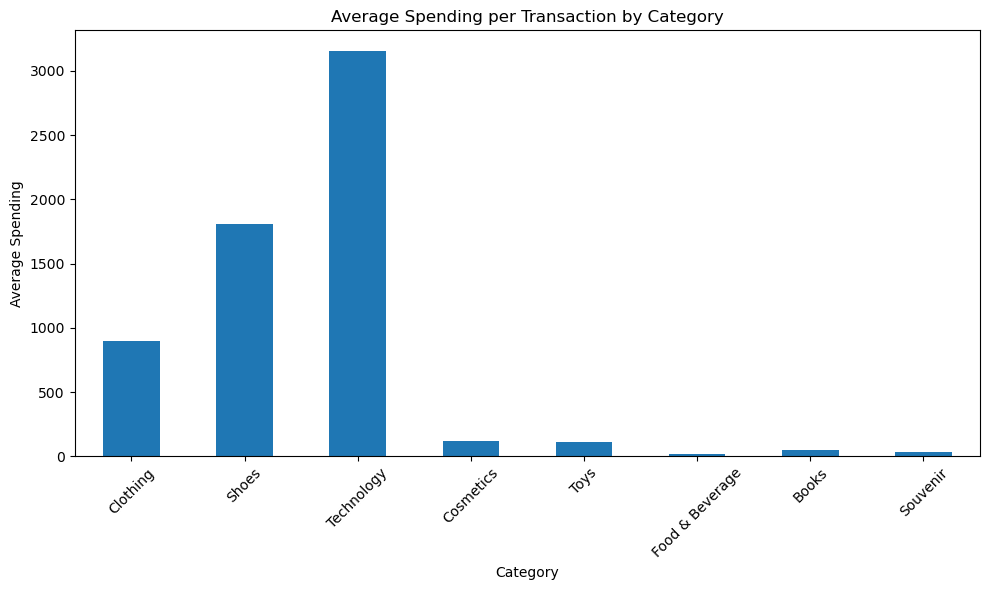

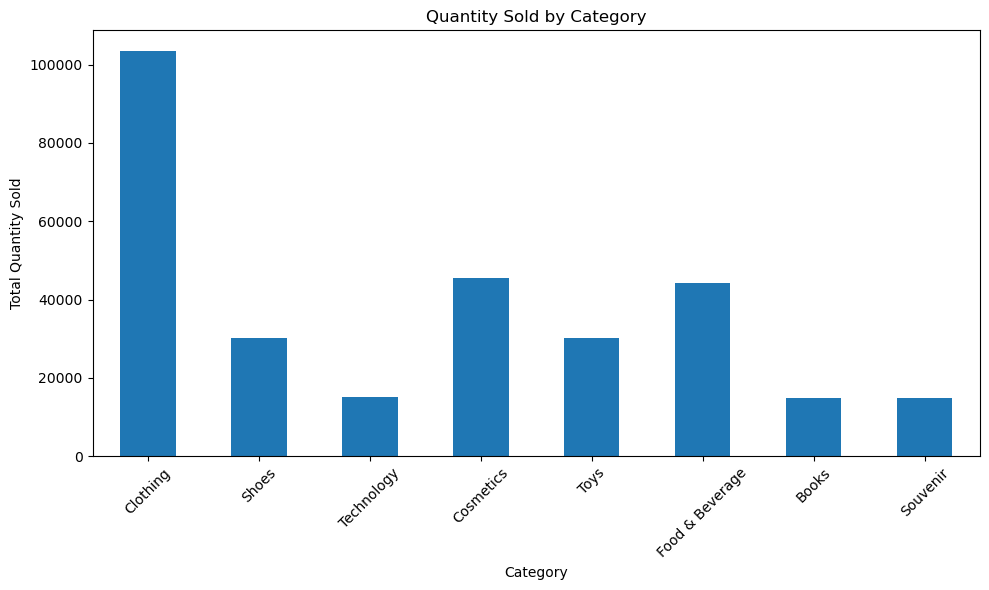

In [26]:
# Sales and Quantity by Category
category_performance = data.groupby('category').agg(
    total_sales=('price', 'sum'),
    total_quantity=('quantity', 'sum'),
    avg_spending=('price', 'mean')
).sort_values(by='total_sales', ascending=False)
# Visualization of Total Sales by Category
plt.figure(figsize=(10, 6))
category_performance['total_sales'].plot(kind='bar', title='Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization of Average Spending by Category
plt.figure(figsize=(10, 6))
category_performance['avg_spending'].plot(kind='bar', title='Average Spending per Transaction by Category')
plt.xlabel('Category')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization of Quantity Sold by Category
plt.figure(figsize=(10, 6))
category_performance['total_quantity'].plot(kind='bar', title='Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




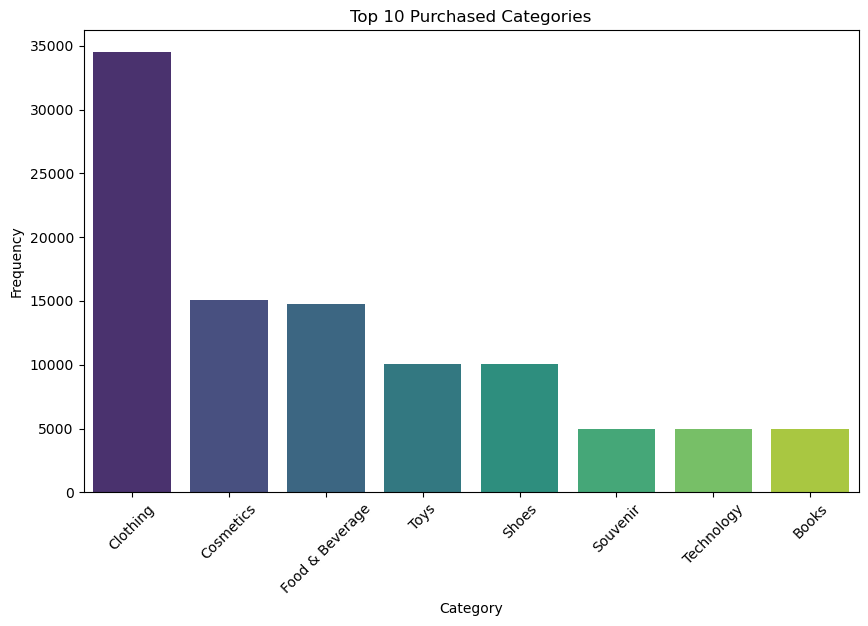

In [28]:
##Top Category
top_categories = data['category'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Purchased Categories")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

## Shopping Mall Performance Analysis

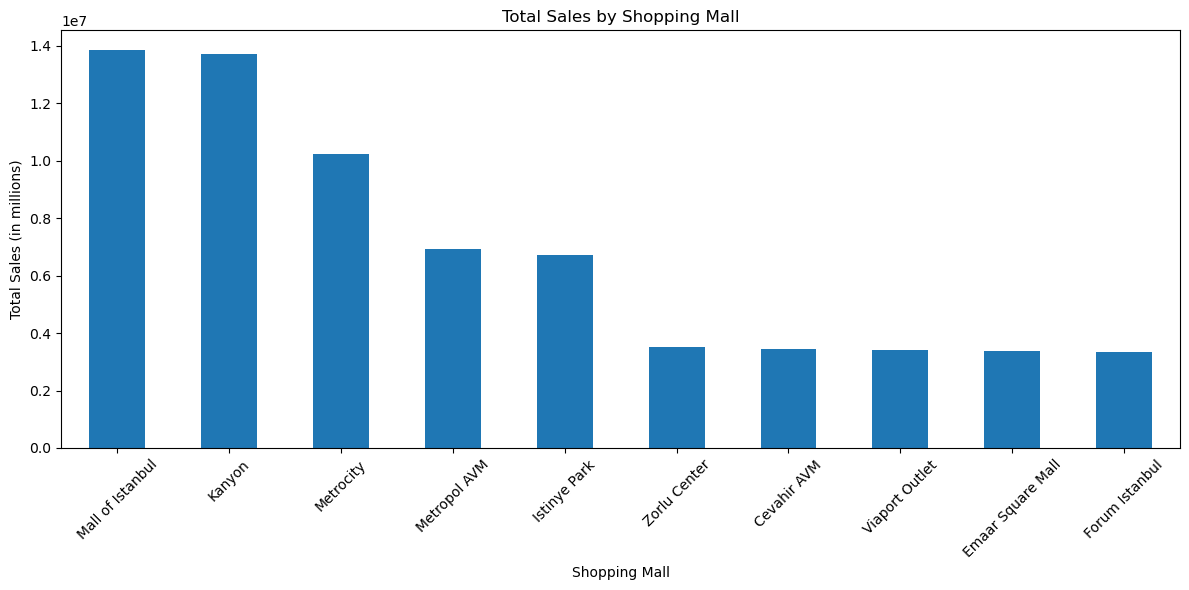

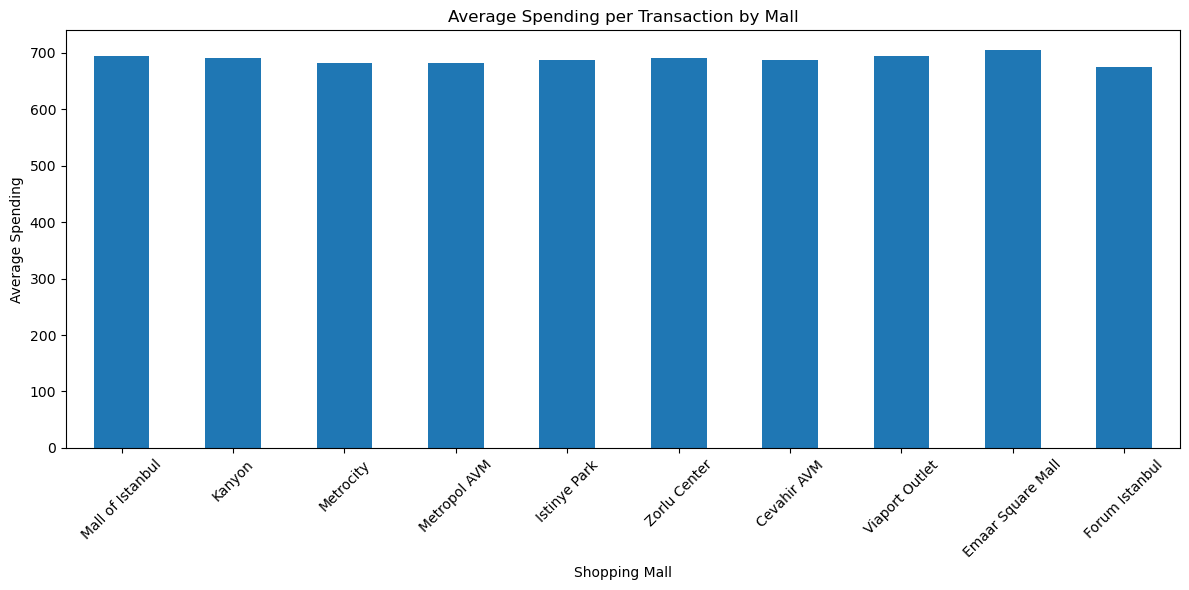

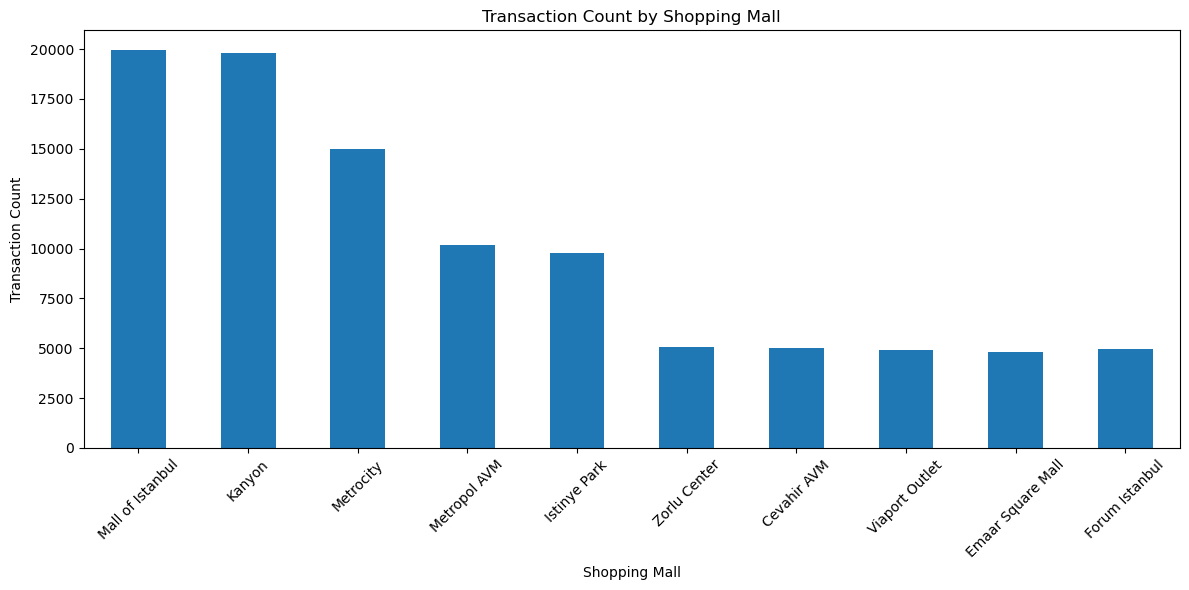

In [31]:
# Sales and Transactions by Shopping Mall
mall_performance = data.groupby('shopping_mall').agg(
    total_sales=('price', 'sum'),
    transaction_count=('invoice_no', 'count'),
    avg_spending=('price', 'mean')
).sort_values(by='total_sales', ascending=False)
# Visualization of Total Sales by Mall
plt.figure(figsize=(12, 6))
mall_performance['total_sales'].plot(kind='bar', title='Total Sales by Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization of Average Spending by Mall
plt.figure(figsize=(12, 6))
mall_performance['avg_spending'].plot(kind='bar', title='Average Spending per Transaction by Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization of Transaction Count by Mall
plt.figure(figsize=(12, 6))
mall_performance['transaction_count'].plot(kind='bar', title='Transaction Count by Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Payment Preferences

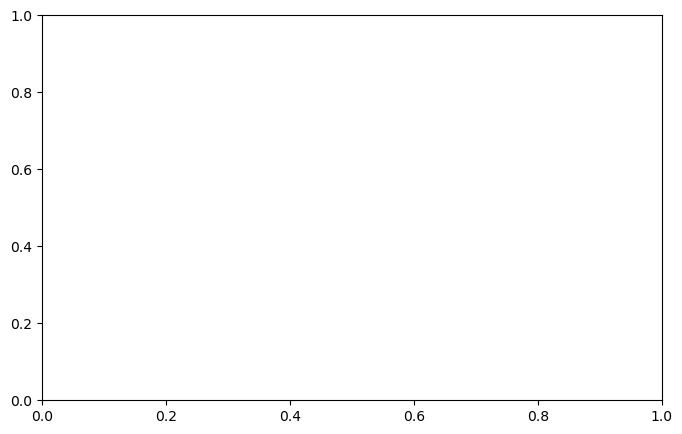

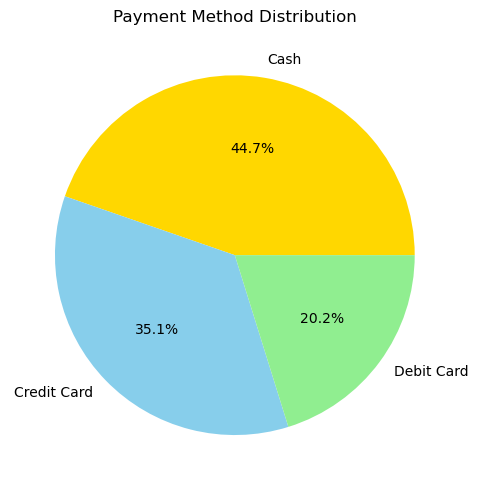

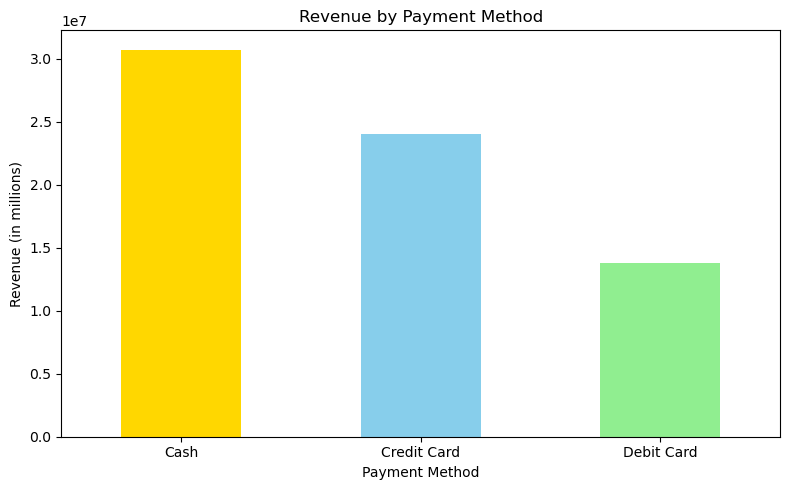

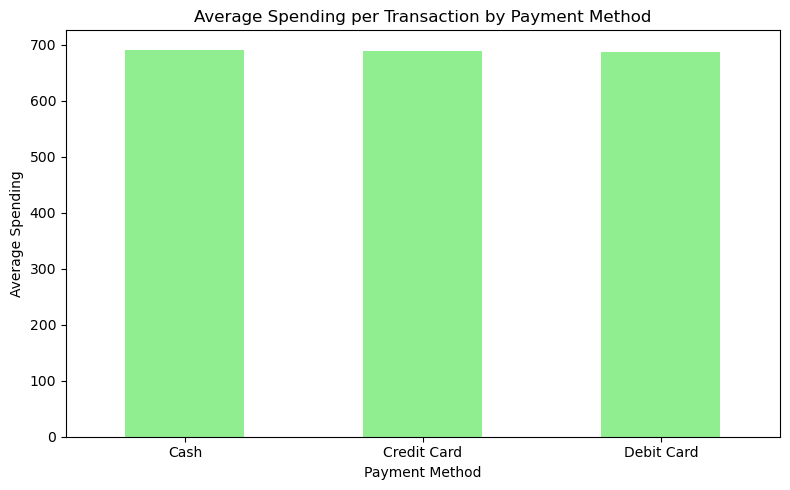

In [38]:
# Transaction count
payment_method_distribution = data['payment_method'].value_counts()

# Revenue by payment method
revenue_by_payment_method = data.groupby('payment_method')['price'].sum()

# Average spending by payment method
avg_spending_by_payment_method = data.groupby('payment_method')['price'].mean()
# Visualization of Payment Method Distribution
plt.figure(figsize=(8, 5))
payment_method_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'skyblue', 'lightgreen'], 
                                 title='Payment Method Distribution', ylabel='')
plt.tight_layout()
plt.show()

# Visualization of Revenue by Payment Method
plt.figure(figsize=(8, 5))
revenue_by_payment_method.plot(kind='bar', color=['gold', 'skyblue', 'lightgreen'], 
                               title='Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Revenue (in millions)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualization of Average Spending per Payment Method
plt.figure(figsize=(8, 5))
avg_spending_by_payment_method.plot(kind='bar', color='lightgreen', title='Average Spending per Transaction by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Spending')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



1. **Sales Trend over Time:**
Sales Trends Insights: In monthly Sales Trend we observe consistent trend with noticeable fluctuations.
In yearly Sales Trend:Sales were relatively stable between 2021 and 2022.2023 shows lower total sales, likely due to incomplete data.

2. **Customer Demographics:**
Gender Distribution:Females account for a larger share of the customer base, contributing to a majority of sales.
Total Sales by Gender:Female customers contribute significantly more to total sales than male customers.
Average Spending by Age Group:Spending is highest among the 40-50 age group, with other groups showing relatively similar spending patterns.

3. **Category Analysis:**
Total Sales by Category: Clothing, Shoes, and Technology dominate sales.
Food & Beverage, Books, and Souvenirs contribute minimally to total revenue.
Average Spending per Transaction by Category: Technology leads with the highest average spending, followed by Shoes.
Lower-priced categories like Food & Beverage, Toys, and Souvenirs have the lowest average spending.
Quantity Sold by Category: Clothing has the highest number of units sold, followed by Cosmetics.
Technology and Shoes sell fewer units but generate high revenue due to higher pricing.

4. **Total Sales by Shopping Mall:**
Mall of Istanbul and Kanyon are the top performers in total revenue.Smaller malls, such as Emaar Square Mall and Forum Istanbul, generate comparatively lower sales.
Average Spending per Transaction by Mall:Emaar Square Mall has the highest average spending, followed by Viaport Outlet and Mall of Istanbul.Forum Istanbul has the lowest average spending per transaction.
Transaction Count by Shopping Mall:Mall of Istanbul and Kanyon lead with the highest number of transactions, reflecting strong customer footfall.
Malls like Zorlu Center and Cevahir AVM have fewer transactions.


6. **Payment Method Distribution:**
Cash dominates with the largest share of transactions, followed by credit cards and debit cards.
Revenue by Payment Method:Cash transactions contribute the highest revenue, with credit cards closely following.
Average Spending per Transaction:Spending is consistent across payment methods, with minor variations.

## Q2.Perform Market Basket Analysis-Identify the categories that are frequently purchased together.Identify upselling and cross selling opportunities as well

C:\Users\Dell\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


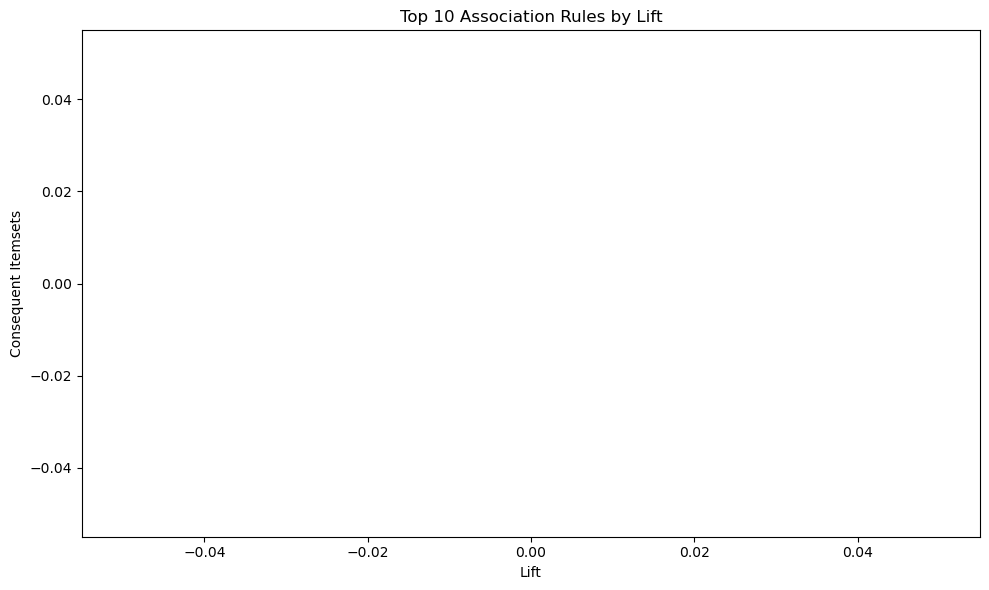

Frequent Itemsets:
     support           itemsets  length
1  0.346753         (Clothing)       1
2  0.151794        (Cosmetics)       1
3  0.148567  (Food & Beverage)       1
7  0.101421             (Toys)       1
4  0.100888            (Shoes)       1
5  0.050263         (Souvenir)       1
6  0.050233       (Technology)       1
0  0.050082            (Books)       1

Filtered Association Rules:
 Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [42]:
basket_data = data.groupby(['invoice_no', 'category'])['quantity'].sum().unstack(fill_value=0)
basket_data = basket_data.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm with adjustable support
frequent_itemsets = apriori(basket_data, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)
num_itemsets = len(frequent_itemsets)
# Generate association rules
rules = association_rules(frequent_itemsets,num_itemsets, metric="lift", min_threshold=1)

# Filter rules by lift and confidence
filtered_rules = rules[(rules['lift'] > 1.5) & (rules['confidence'] > 0.6)]

# Visualization of top 10 rules by lift
top_rules = filtered_rules.sort_values(by='lift', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_rules['consequents'].astype(str), top_rules['lift'], color='skyblue')
plt.xlabel('Lift')
plt.ylabel('Consequent Itemsets')
plt.title('Top 10 Association Rules by Lift')
plt.tight_layout()
plt.show()

# Output results
print("Frequent Itemsets:\n", frequent_itemsets.sort_values(by='support', ascending=False))
print("\nFiltered Association Rules:\n", filtered_rules)

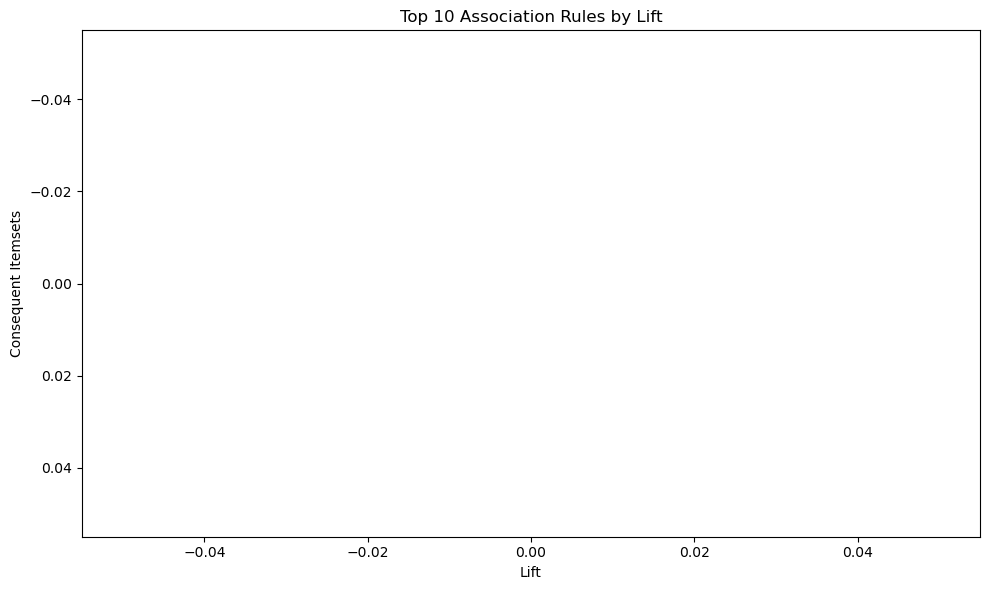

In [44]:
# Visualization of top 10 rules by lift
import matplotlib.pyplot as plt

# Select the top 10 rules by lift
top_rules = filtered_rules.sort_values(by='lift', ascending=False).head(10)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_rules['consequents'].astype(str), top_rules['lift'], color='skyblue')
plt.xlabel('Lift')
plt.ylabel('Consequent Itemsets')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


## Recommendations

1.**Upselling Strategies:**
Premium Accessories: For "Electronics" buyers, suggest premium add-ons (e.g., wireless headphones for smartphones).
Outfit Combinations: For "Clothing" purchases, promote shoes as part of a style set (e.g., formal wear with matching footwear).

2.**Cross-Selling Strategies:**
Bundles: Offer bundles for frequently associated items. For example:Snacks + Beverages as a “Movie Night Combo.”
Electronics + Accessories as a “Tech Essentials Bundle.”

## Q3.Predict the most likely categories that each of this customer might purchase

In [48]:
# Aggregate purchase data by customer_id
customer_summary =data.groupby(['customer_id', 'category']).agg({
    'quantity': 'sum',  # Total quantity purchased for each category
    'price': 'sum'      # Total spending for each category
}).reset_index()

# Identify the most purchased category for each customer
customer_summary['total_purchases'] = customer_summary['quantity'] * customer_summary['price']
top_categories = customer_summary.loc[
    customer_summary.groupby('customer_id')['total_purchases'].idxmax()
]

# Merge with customer demographic data for a complete profile
customer_profiles =data[['customer_id', 'gender', 'age']].drop_duplicates()
customer_profiles = customer_profiles.merge(
    top_categories[['customer_id', 'category']], on='customer_id'
)

# Display the summarized data
customer_profiles.head()

,customer_id,gender,age,category
0,C241288,Female,28,Clothing
1,C111565,Male,21,Shoes
2,C266599,Male,20,Clothing
3,C988172,Female,66,Shoes
4,C189076,Female,53,Books


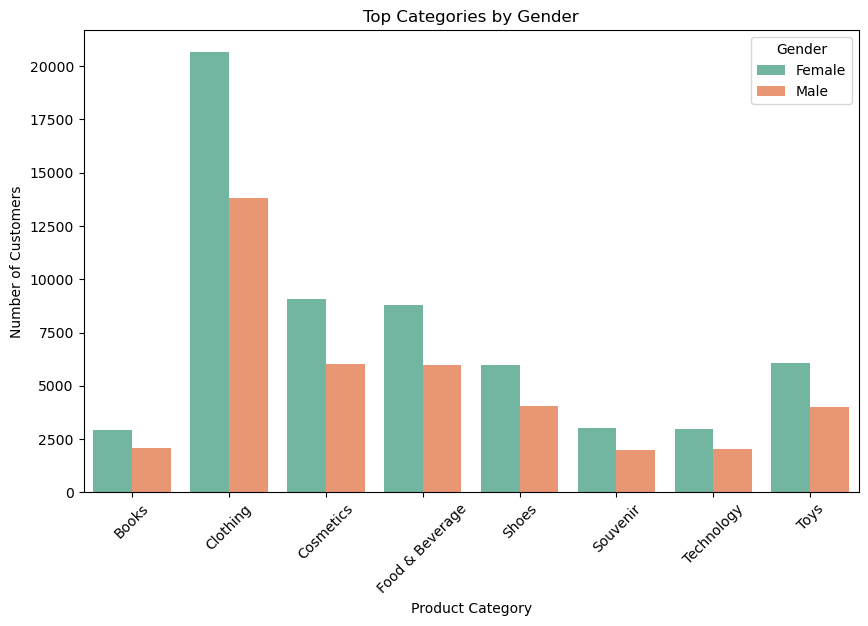

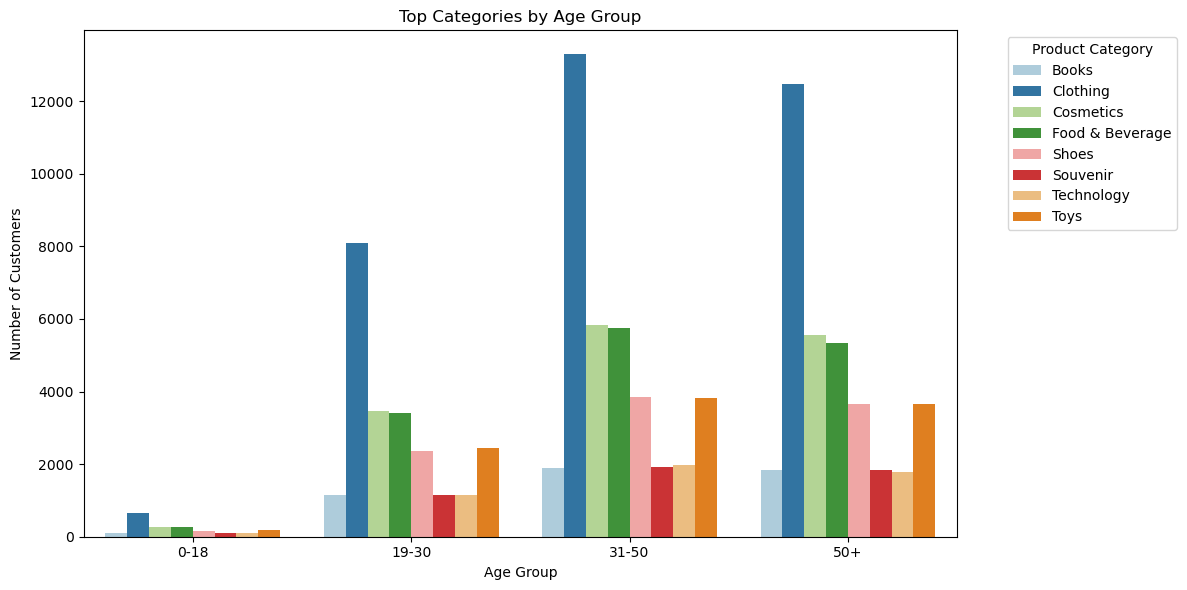

In [50]:
## Analyzing the purchase trends based on gender and age to identify patterns that might influence customer preferences.
# Distribution of top categories by gender
gender_category_counts = customer_profiles.groupby(['gender', 'category']).size().reset_index(name='count')

# Plot: Top categories by gender
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_category_counts, x='category', y='count', hue='gender', palette='Set2')
plt.title('Top Categories by Gender')
plt.xlabel('Product Category')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

# Distribution of top categories by age group
customer_profiles['age_group'] = pd.cut(customer_profiles['age'], bins=[0, 18, 30, 50, 100], 
                                        labels=['0-18', '19-30', '31-50', '50+'])
age_category_counts = customer_profiles.groupby(['age_group', 'category']).size().reset_index(name='count')

# Plot: Top categories by age group
plt.figure(figsize=(12, 6))
sns.barplot(data=age_category_counts, x='age_group', y='count', hue='category', palette='Paired')
plt.title('Top Categories by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

 **Insights from the Analysis:**
Top Categories by Gender:Certain categories (e.g., Clothing) are more popular among female customers, while others (e.g., Shoes) have a higher share among male customers.
The gender distribution provides a clear signal that preferences vary by demographic.
Top Categories by Age Group:Younger customers (ages 19–30) exhibit diverse preferences across multiple categories.
Customers aged 50+ are inclined towards specific categories, such as Books or Shoes, indicating potential age-driven preferences.

## Predictive Modeling Plan:
1.Feature Engineering:Use customer demographics (e.g., gender, age group) and purchase history as inputs.Convert categorical variables into numerical representations (e.g., one-hot encoding).

2. Model Selection: Classification model like Decision Tree, Random Forest, or Logistic Regression can predict the most likely category.
   
3. Evaluation: Use metrics like accuracy and F1-score to evaluate the model's performance.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Encode categorical features
customer_profiles['gender_encoded'] = LabelEncoder().fit_transform(customer_profiles['gender'])
customer_profiles['age_group_encoded'] = LabelEncoder().fit_transform(customer_profiles['age_group'])
customer_profiles['category_encoded'] = LabelEncoder().fit_transform(customer_profiles['category'])

# Prepare features (X) and target (y)
X = customer_profiles[['gender_encoded', 'age_group_encoded']]
y = customer_profiles['category_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=customer_profiles['category'].unique())
report

'                 precision    recall  f1-score   support\n\n       Clothing       0.00      0.00      0.00      1022\n          Shoes       0.35      1.00      0.51      6885\n          Books       0.00      0.00      0.00      3059\n      Cosmetics       0.00      0.00      0.00      2919\nFood & Beverage       0.00      0.00      0.00      1941\n           Toys       0.00      0.00      0.00      1008\n     Technology       0.00      0.00      0.00       991\n       Souvenir       0.00      0.00      0.00      2067\n\n       accuracy                           0.35     19892\n      macro avg       0.04      0.12      0.06     19892\n   weighted avg       0.12      0.35      0.18     19892\n'

 **The Random Forest Classifier achieved:**
 
 **Accuracy:** 35% (focused on one dominant category: Shoes).
 
**Issues:** Poor performance for other categories.

 **Imbalanced dataset:** One category (Shoes) dominates, skewing predictions.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import numpy as np

# Encode categorical variables
data['gender_encoded'] = LabelEncoder().fit_transform(data['gender'])
data['mall_encoded'] = LabelEncoder().fit_transform(data['shopping_mall'])
data['payment_encoded'] = LabelEncoder().fit_transform(data['payment_method'])
data['category_encoded'] = LabelEncoder().fit_transform(data['category'])

# Aggregate customer-level features
customer_features =data.groupby('customer_id').agg({
    'gender_encoded': 'first',
    'age': 'first',
    'mall_encoded': 'first',
    'payment_encoded': 'first',
    'quantity': ['sum', 'mean'],
    'price': ['sum', 'mean'],
    'invoice_no': 'count'
}).reset_index()

# Flatten multi-level columns
customer_features.columns = [
    'customer_id', 'gender_encoded', 'age', 'mall_encoded', 'payment_encoded',
    'total_quantity', 'avg_quantity', 'total_spending', 'avg_spending', 'purchase_count'
]

# Prepare features (X) and target (y)
customer_data_unique =data.drop_duplicates(subset=['customer_id', 'category_encoded'])
customer_labels = customer_data_unique[['customer_id', 'category_encoded']].set_index('customer_id')
X = customer_features.drop(columns=['customer_id'])
y = customer_features['customer_id'].map(customer_labels['category_encoded']).fillna(-1).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict the most likely categories
y_pred = xgb_model.predict(X_test)

# Map predictions back to categories
categories = LabelEncoder().fit(data['category']).inverse_transform(np.unique(y))
predicted_categories = [categories[int(pred)] for pred in y_pred]

# Prepare results
results = pd.DataFrame({
    'customer_id': customer_features.iloc[X_test.index]['customer_id'].values,
    'predicted_category': predicted_categories
})

results.head()

,customer_id,predicted_category
0,C289430,Shoes
1,C108942,Cosmetics
2,C932895,Cosmetics
3,C178478,Food & Beverage
4,C101132,Souvenir


## Q4.Identify the marketing strategies to increase sales from low performing malls.

In [59]:
# Convert the 'invoice_date' column to datetime for better analysis
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='%d-%m-%Y')

# Calculate total sales by mall
mall_sales = data.groupby('shopping_mall')['price'].sum().sort_values(ascending=False).reset_index()
mall_sales.columns = ['shopping_mall', 'total_sales']

# Identify the low-performing malls (bottom 25% in sales)
threshold = mall_sales['total_sales'].quantile(0.25)
low_performing_malls = mall_sales[mall_sales['total_sales'] <= threshold]

mall_sales, low_performing_malls

(       shopping_mall  total_sales
 0   Mall of Istanbul  13851737.62
 1             Kanyon  13710755.24
 2          Metrocity  10249980.07
 3       Metropol AVM   6937992.99
 4       Istinye Park   6717077.54
 5       Zorlu Center   3509649.02
 6        Cevahir AVM   3433671.84
 7     Viaport Outlet   3414019.46
 8  Emaar Square Mall   3390408.31
 9     Forum Istanbul   3336073.82,
        shopping_mall  total_sales
 7     Viaport Outlet   3414019.46
 8  Emaar Square Mall   3390408.31
 9     Forum Istanbul   3336073.82)

In [62]:
# Filter data for low-performing malls
low_performing_data = data[data['shopping_mall'].isin(low_performing_malls['shopping_mall'])]

# Analyze customer demographics (gender and age) in low-performing malls
customer_demographics = low_performing_data.groupby(['shopping_mall', 'gender']).agg(
    total_customers=('customer_id', 'nunique'),
    avg_age=('age', 'mean')
).reset_index()

# Analyze product categories sold in low-performing malls
category_sales = low_performing_data.groupby(['shopping_mall', 'category'])['price'].sum().reset_index()
category_sales = category_sales.sort_values(['shopping_mall', 'price'], ascending=[True, False])

# Analyze payment methods in low-performing malls
payment_analysis = low_performing_data.groupby(['shopping_mall', 'payment_method'])['price'].sum().reset_index()
payment_analysis = payment_analysis.sort_values(['shopping_mall', 'price'], ascending=[True, False])

customer_demographics, category_sales, payment_analysis

(       shopping_mall  gender  total_customers    avg_age
 0  Emaar Square Mall  Female             2842  43.708304
 1  Emaar Square Mall    Male             1969  43.349924
 2     Forum Istanbul  Female             3016  43.438660
 3     Forum Istanbul    Male             1931  43.691869
 4     Viaport Outlet  Female             2949  43.568667
 5     Viaport Outlet    Male             1965  42.894148,
         shopping_mall         category       price
 1   Emaar Square Mall         Clothing  1511803.04
 4   Emaar Square Mall            Shoes   871446.84
 6   Emaar Square Mall       Technology   834750.00
 2   Emaar Square Mall        Cosmetics    92379.52
 7   Emaar Square Mall             Toys    49423.36
 0   Emaar Square Mall            Books    11059.50
 3   Emaar Square Mall  Food & Beverage    11030.07
 5   Emaar Square Mall         Souvenir     8515.98
 9      Forum Istanbul         Clothing  1572119.12
 12     Forum Istanbul            Shoes   875648.03
 14     Forum Istanbu

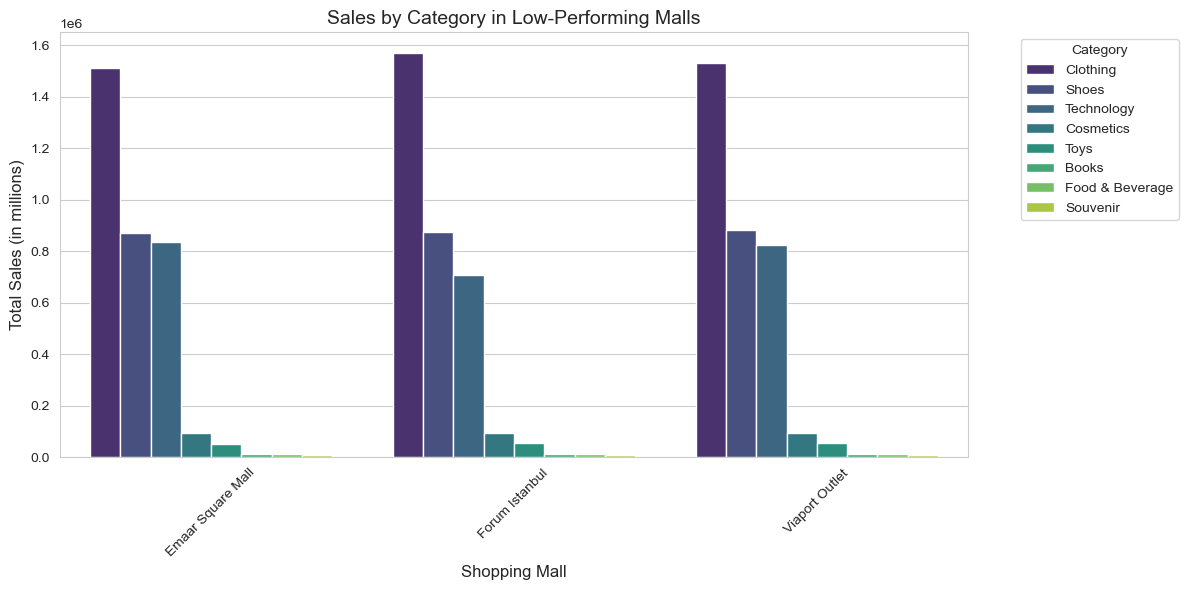

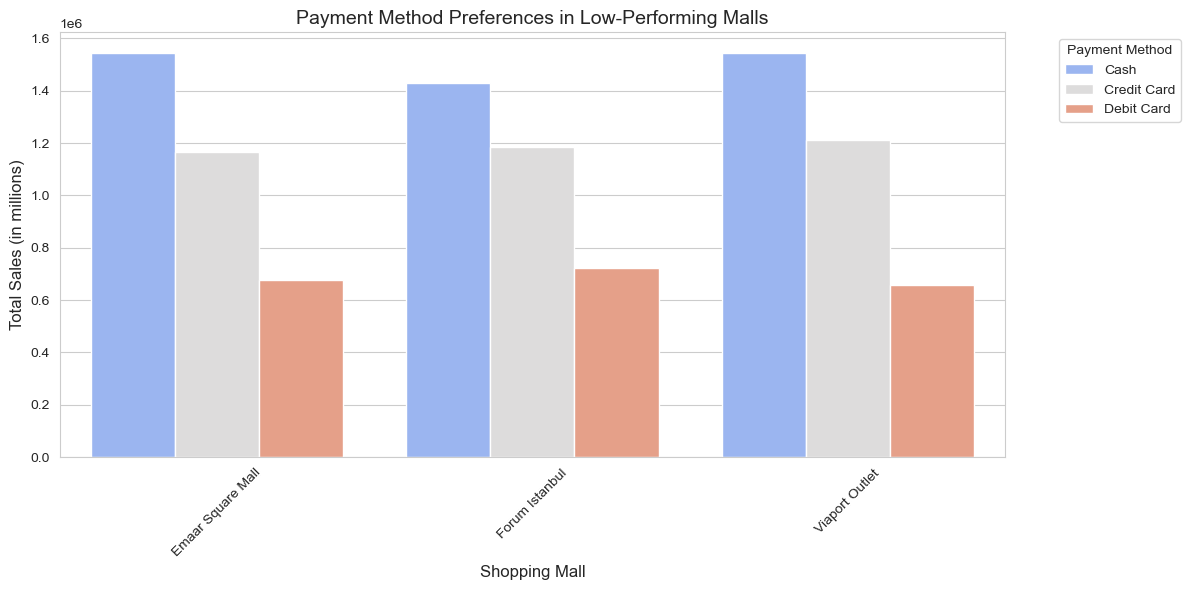

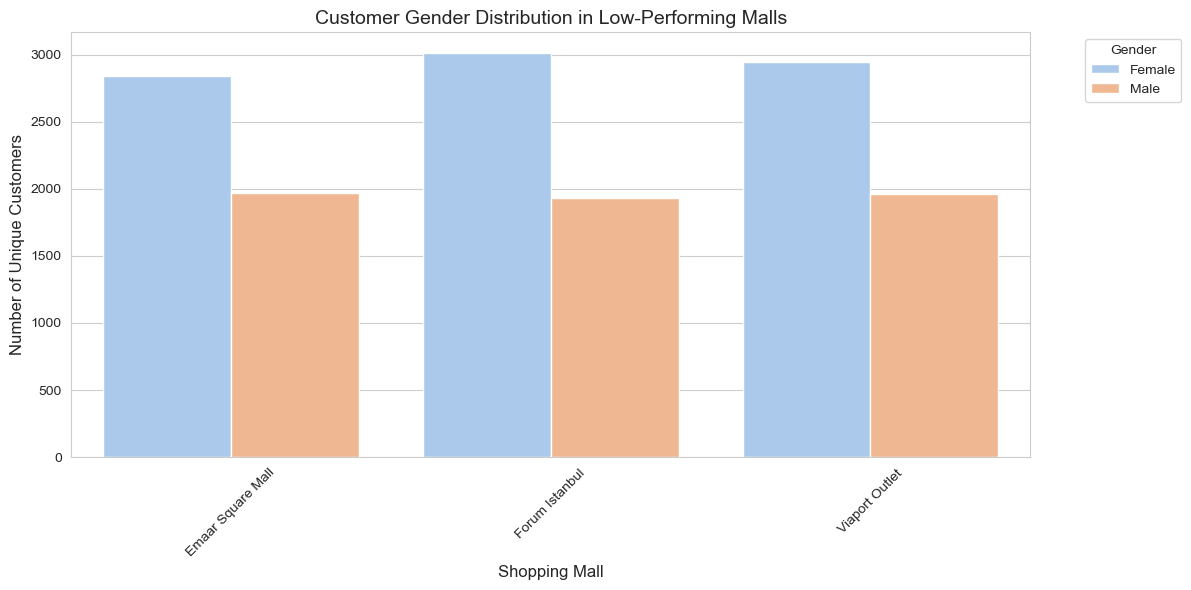

In [64]:
# Set visualization style
sns.set_style("whitegrid")

# Visualization 1: Sales by Category for Low-Performing Malls
plt.figure(figsize=(12, 6))
sns.barplot(
    data=category_sales,
    x="shopping_mall",
    y="price",
    hue="category",
    palette="viridis"
)
plt.title("Sales by Category in Low-Performing Malls", fontsize=14)
plt.xlabel("Shopping Mall", fontsize=12)
plt.ylabel("Total Sales (in millions)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization 2: Payment Method Preferences in Low-Performing Malls
plt.figure(figsize=(12, 6))
sns.barplot(
    data=payment_analysis,
    x="shopping_mall",
    y="price",
    hue="payment_method",
    palette="coolwarm"
)
plt.title("Payment Method Preferences in Low-Performing Malls", fontsize=14)
plt.xlabel("Shopping Mall", fontsize=12)
plt.ylabel("Total Sales (in millions)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Payment Method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization 3: Customer Gender Distribution in Low-Performing Malls
plt.figure(figsize=(12, 6))
sns.barplot(
    data=customer_demographics,
    x="shopping_mall",
    y="total_customers",
    hue="gender",
    palette="pastel"
)
plt.title("Customer Gender Distribution in Low-Performing Malls", fontsize=14)
plt.xlabel("Shopping Mall", fontsize=12)
plt.ylabel("Number of Unique Customers", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Analysis of Low-Performing Malls:
1. **Customer Demographics:**
   The average customer age is around 43 years across all low-performing malls.
   Female customers are slightly more prevalent than male customers in all malls.
2. **Product Categories:**
Top-selling categories in all low-performing malls are Clothing, Shoes, and Technology, contributing the most to total sales.
Categories like Books, Toys, and Souvenirs generate the least revenue.
3. **Payment Methods:**
Cash payments dominate in all low-performing malls, followed by Credit Card and Debit Card transactions.

## Recommendations to Boost Sales in Low-Performing Malls:
1. **Enhance Promotions for Popular Categories:**
Increase discounts and bundle offers on Clothing, Shoes, and Technology to attract more customers.Partner with brands in these categories for exclusive deals.
2. **Target Female Customers:**
Tailor marketing campaigns to attract female shoppers, such as exclusive women's shopping events or loyalty programs.
3. **Improve Visibility for Underperforming Categories:**
Create promotional campaigns for less-popular categories like Books and Souvenirs to diversify sales.
Bundle these items with top-selling products to increase purchase likelihood.
4. **Introduce Digital Payment Incentives:**
Offer cashback or discounts for customers using Credit Cards or Debit Cards, reducing reliance on cash payments.
5. **Leverage Customer Loyalty:**
Introduce mall-specific loyalty programs offering rewards for repeat purchases, particularly targeting the 40–50 age demographic.